# Introduction to image classification in deep learning with tensor flow
## Initialisation

In [1]:
import tensorflow as tf

print(tf.__version__)

import matplotlib.pyplot    as plt
import numpy                as np
import random               as rd

/home/dr3m/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


2.0.0-alpha0


## data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['Top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal',
    'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## random image

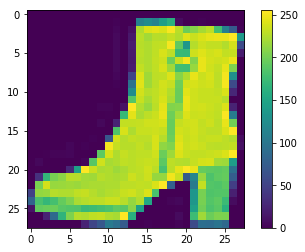

Ankle boot


In [3]:
image = rd.randint(0,len(y_train))
plt.figure()
plt.imshow(x_train[image])
plt.colorbar()
plt.grid(False)
plt.show()
print(class_names[y_train[image]])

## 25 first photos

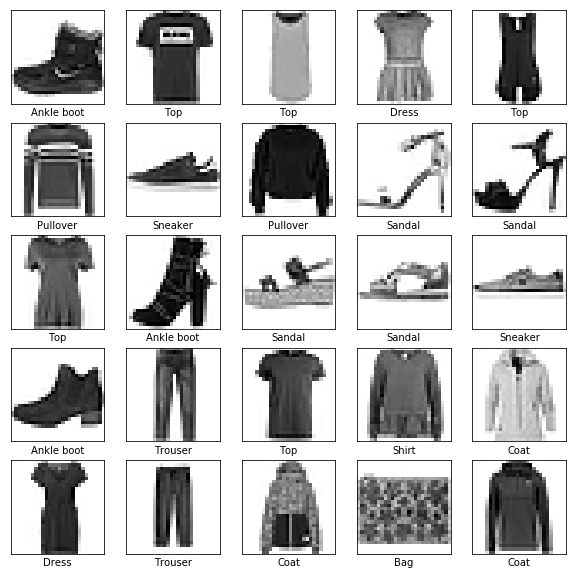

In [4]:
x_train, x_test = x_train/255.0, x_test/255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## fitting

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=8)

Epoch 1/8
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4969 - accuracy: 0.8239
Epoch 2/8
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3766 - accuracy: 0.8643
Epoch 3/8
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3374 - accuracy: 0.8774
Epoch 4/8
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3108 - accuracy: 0.8862
Epoch 5/8
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2955 - accuracy: 0.8903
Epoch 6/8
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2806 - accuracy: 0.8965
Epoch 7/8
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2664 - accuracy: 0.9014
Epoch 8/8
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2590 - accuracy: 0.9042


## evaluation

In [6]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 29us/sample - loss: 0.3341 - accuracy: 0.8852


[0.3341397529244423, 0.8852]

## predictions

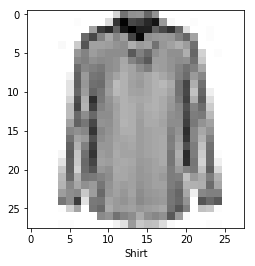

Shirt


In [7]:
image_test = rd.randint(0,len(y_test))

plt.figure()
plt.grid(False)
plt.imshow(x_test[image_test], cmap=plt.cm.binary)
plt.xlabel(class_names[y_test[image_test]])
plt.show()


prediction = model.predict(x_test)
print(class_names[np.argmax(prediction[image_test])])

## functions

In [8]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## prediction of the 25 first photos

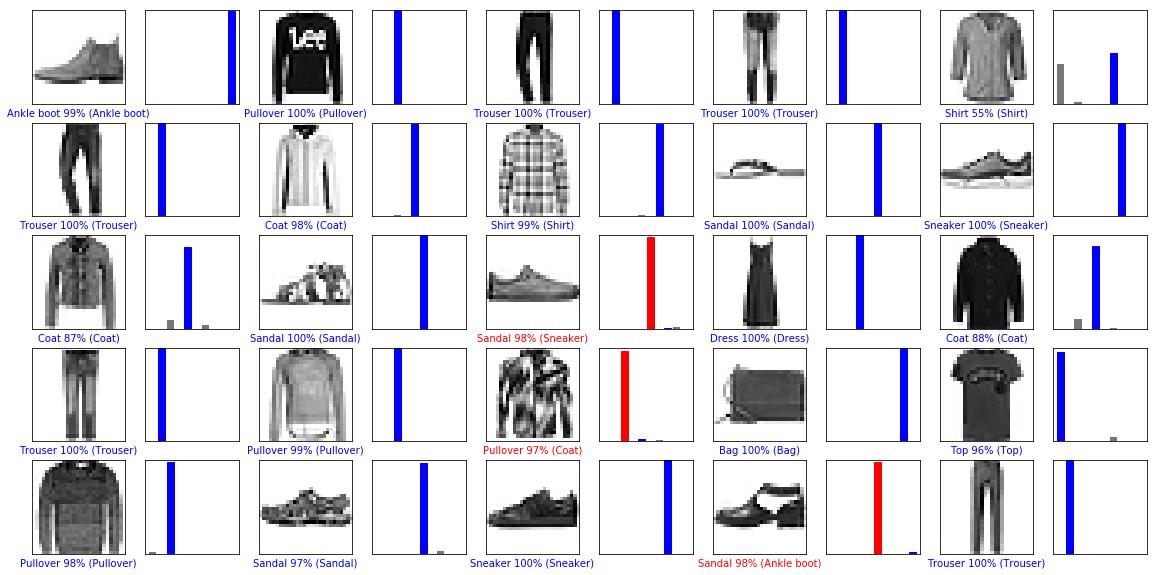

In [9]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction, y_test)
plt.show()

## new function

In [10]:
def plot_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[0], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## prediction of a single image

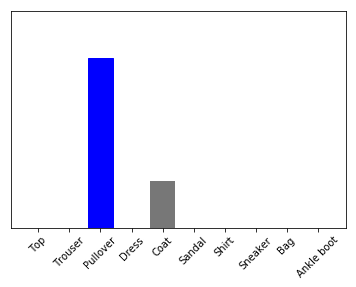

In [11]:
n=rd.randint(0,len(y_test))

print(n)

img = x_test[n]
img = (np.expand_dims(img,0))
prediction_single = model.predict(img)

plot_array(n, prediction_single, y_test)
_ = plt.xticks(range(10), class_names, rotation=45)